Población total N = 1000, S0 = 990, I0 = 10, R0 = 0


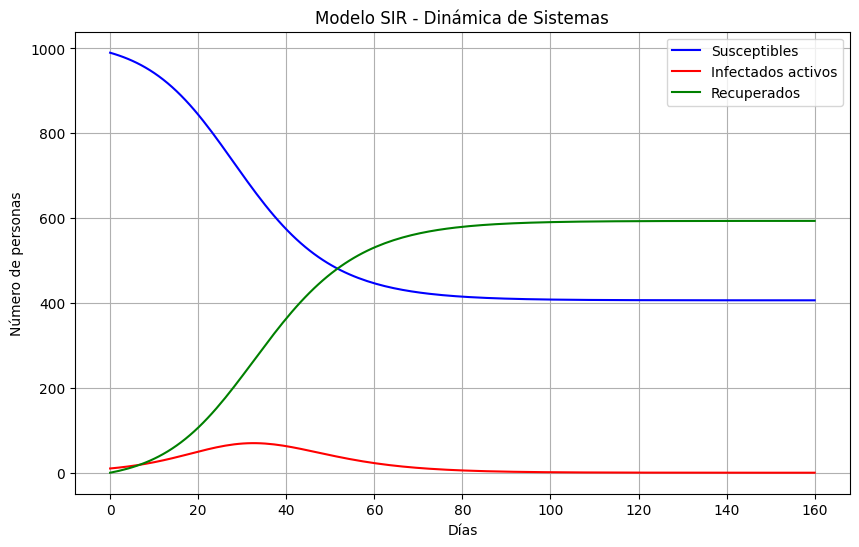

In [56]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = 1000 
#inciales
I0 = 10 #infectado 
R0 = 0 #recuperado
S0 = N - I0 - R0 #susceptble

# SIR

beta = 0.3 #Transmision 
gamma = 0.2 #Recuperacion 

# Intervalo de tiempo (en días)
t = np.linspace(0, 160, 160)

#Ecuaciones 
def deriv(y,t,N,beta,gamma):
    S,I,R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt,dIdt,dRdt

#INICIO
y0 = S0, I0, R0

# Resolver el sistema de ODEs
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

print(f"Población total N = {N}, S0 = {S0}, I0 = {I0}, R0 = {R0}")


plt.figure(figsize=(10,6))
plt.plot(t, S, 'b', label='Susceptibles')
plt.plot(t, I, 'r', label='Infectados activos')
plt.plot(t, R, 'g', label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Número de personas')
plt.title('Modelo SIR - Dinámica de Sistemas')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import random

class Persona: 
    def __init__(self, edad, mascarilla, estado = "S"):
        self.edad = edad 
        self.mascarilla = mascarilla #0no o 1si
        self.estado = estado #SIR
        self.dias_infectado = 0 #CONTADOR
        self.contagios_realizados = 0
        self.fue_infectado = False

    def es_infectado(self):
        return self.estado == "I"
    def es_susceptible(self):
        return self.estado == "S"
    def es_recuperado(self):
        return self.estado == "R"

#POBLACION
def crear_poblacion(N=1000, infectados_iniciales= 10):
    poblacion = []
    for i in range(N):
        edad = random.randint(0,90)
        mascarilla = random.randint(0,1)
        estado = "S"
        persona = Persona(edad, mascarilla, estado)
        poblacion.append(persona)
    # Infecciones aleatorias
    infectados = random.sample(poblacion, infectados_iniciales)
    for p in infectados:
        p.estado = 'I'
        p.fue_infectado = True
    return poblacion

    

In [ ]:
def simular_dia(poblacion, beta=0.3, gamma=0.1, contactosPdia=10):
    N = len(poblacion)
    nuevas_infecciones = 0 
    nuevas_recuperaciones = 0 
    efecto_mascarilla = 0.6 # aprox 

    for persona in poblacion:
        if persona.estado == "I":
            persona.dias_infectado += 1

            if random.random() < gamma:
                persona.estado = "R"
                nuevas_recuperaciones += 1
            else:
                for _ in range(contactosPdia):
                    objetivo = random.choice(poblacion)
                    if objetivo.estado == "S":
                        beta_mod = beta * (1 - persona.mascarilla * efecto_mascarilla) * (1 - objetivo.mascarilla * efecto_mascarilla)
                        if random.random() < beta_mod:
                            objetivo.estado = "I"
                            objetivo.fue_infectado = True  
                            persona.contagios_realizados += 1
                            nuevas_infecciones += 1
    return nuevas_infecciones, nuevas_recuperaciones


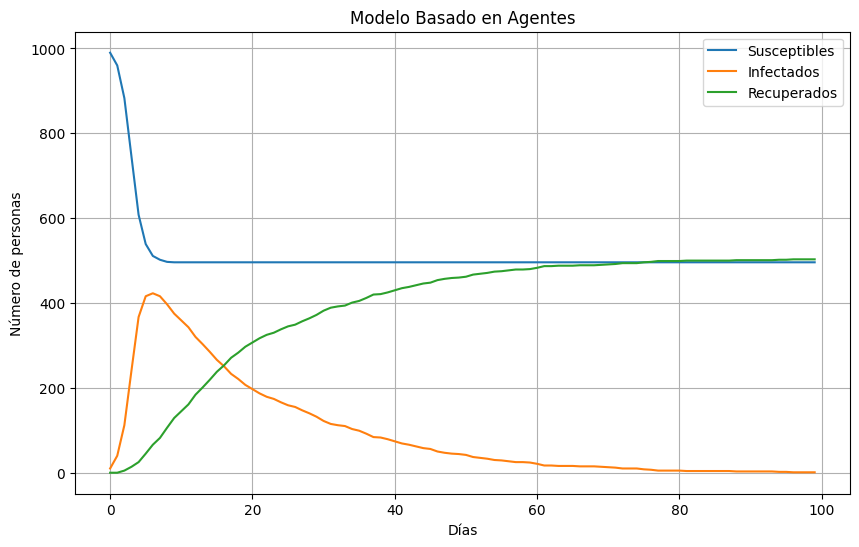

In [ ]:
# Ejecutar la simulación
dias = 100
poblacion = crear_poblacion()
resultados = {'S': [], 'I': [], 'R': []}

for dia in range(dias):
    s = sum(1 for p in poblacion if p.estado == 'S')
    i = sum(1 for p in poblacion if p.estado == 'I')
    r = sum(1 for p in poblacion if p.estado == 'R')
    resultados['S'].append(s)
    resultados['I'].append(i)
    resultados['R'].append(r)
    print(f"Día {dia}: S={s}, I={i}, R={r}")

    simular_dia(poblacion, beta=beta, gamma=gamma)

# Graficar
plt.figure(figsize=(10,6))
plt.plot(resultados['S'], label='Susceptibles')
plt.plot(resultados['I'], label='Infectados')
plt.plot(resultados['R'], label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Número de personas')
plt.title('Modelo Basado en Agentes')
plt.legend()
plt.grid(True)
plt.show()


## Superpropagación

In [53]:
# analisis
superpropagadores = [
    p for p in poblacion 
    if p.contagios_realizados >= 5 and p.mascarilla == 0
]

contagios_super = sum(p.contagios_realizados for p in superpropagadores)
contagios_totales = sum(p.contagios_realizados for p in poblacion)
if contagios_totales > 0:
    porcentaje_super = contagios_super / contagios_totales * 100
else:
    porcentaje_super = 0.0

print(f"Agentes considerados superpropagadores: {len(superpropagadores)}")
print(f"Contagios causados por ellos: {contagios_super}")
print(f"Contagios totales: {contagios_totales}")
print(f"Porcentaje de contagios por superpropagadores: {porcentaje_super:.2f}%")


Agentes considerados superpropagadores: 0
Contagios causados por ellos: 0
Contagios totales: 0
Porcentaje de contagios por superpropagadores: 0.00%


In [54]:
super_data = [
    (p.edad, p.mascarilla, p.contagios_realizados)
    for p in poblacion if p.contagios_realizados >= 5
]


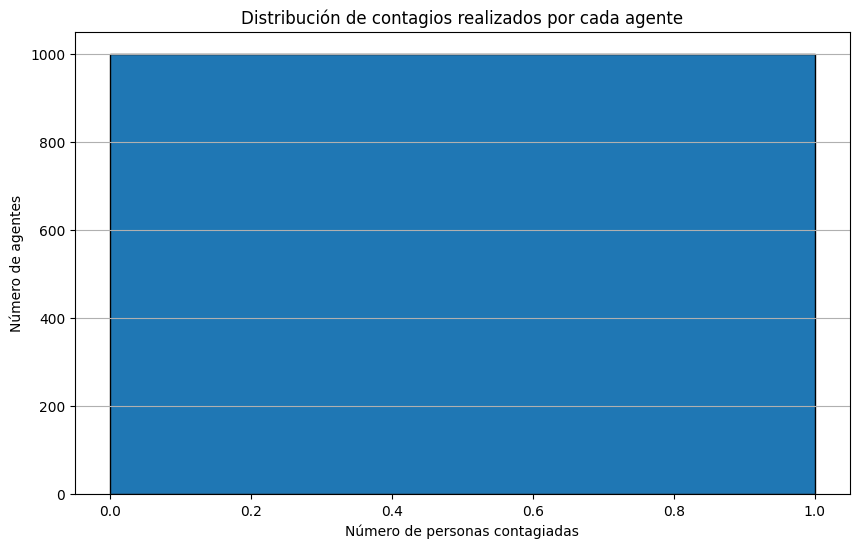

In [55]:
contagios_por_agente = [p.contagios_realizados for p in poblacion]

plt.figure(figsize=(10, 6))
plt.hist(contagios_por_agente, bins=range(0, max(contagios_por_agente)+2), edgecolor='black')
plt.title("Distribución de contagios realizados por cada agente")
plt.xlabel("Número de personas contagiadas")
plt.ylabel("Número de agentes")
plt.grid(axis='y')
plt.show()